# Problem Statement

The HR department of our company wants to hire a new Staff Software Engineer between levels 6 and 7. He is asking for a salary between 180.000 and 200.000. The first data scientist used Linear regression and to check if the prediction was correct the department asked a colleague to implement another algorithm to check the prediction.

# Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Position_Salaries.csv")
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Pre Process  - Pre Feature Scaling

In [3]:
# make the y and X a 2d arrays

In [4]:
y = y.reshape(len(y),1)

# Feature Scaling

In [5]:
# The methods in feature scaling need a 2d class
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Train the SVR Model

In [6]:
# Radio Basis Function Kernel
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting Results

In [10]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

# Visualizing the SVR results

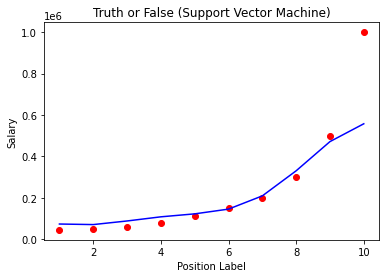

In [11]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color ='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title("Truth or False (Support Vector Machine)")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()

# Heavier but clearer Visualization

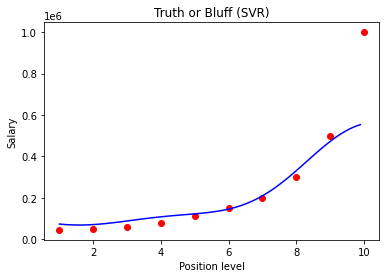

In [14]:
# Visualization For A Better SVR Resutls
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)) , color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()